In [30]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [31]:

if torch.cuda.is_available():
  device = torch.device("cuda")

else:
  device = torch.device("cpu")


In [32]:
from google.colab import drive
drive.mount("/content/drive")
train_Data = pd.read_csv("/content/drive/MyDrive/Urdu_hate/train_set_taskA - train_set_Fire2022.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
train_Data

,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences
0,0,0,0,1,1,0,0,محبت کے پردے میں نفرت کرنےوالو
1,0,0,0,0,0,1,0,حامد میر کی خوشی کے لئے اس کا ذمہ دار حکومت ہو...
2,0,0,0,0,0,0,1,اس نئے سال کی شام، ایک سپاہی قاتل (لارنس Fishb...
3,0,0,0,0,0,0,1,کچھ اس طرح سے ایک فلم کے لئے جا سکتے ہیں لیکن ...
4,0,0,0,0,0,0,1,"رون ہاورڈ اور اس کے ""ایڈیٹرز"" صرف اتنا کرنا ....."
...,...,...,...,...,...,...,...,...
7795,0,0,0,0,0,0,1,آپ کس طرح نوجوان برطانوی اداکار کی اس قابل احت...
7796,0,0,0,0,0,0,1,میں نے امریکہ کے کنفیڈریشن امریکہ میں ورجینیا ...
7797,0,0,0,0,0,1,0,سورۃ نمبر النساء آیت نمبر جب تم سفر پر جا رہے ...
7798,0,0,1,0,0,0,0,رونا یہ نہیں کہ حالات خراب ہیں اوراس بیماری نے...


In [34]:
X_train = np.array(train_Data['Sentences'])
y_train_arr = np.array(train_Data.drop(['Sentences'],axis = 1),dtype = np.float64)




In [35]:
y_train_arr

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
X_train

array(['محبت کے پردے میں نفرت کرنےوالو',
       'حامد میر کی خوشی کے لئے اس کا ذمہ دار حکومت ہو گی خوش',
       'اس نئے سال کی شام، ایک سپاہی قاتل (لارنس Fishburne، کی شکل میں) ایک شعبے برف تک وجہ سے بند کر رہا ہے کہ میں ختم ہے. لوگوں پر محاصرے layed رہے ہیں، پولیس کو زندہ رہنے کے لئے cons کے ساتھ ٹیم کے لئے ہے. جان بڑھئ کلاسک کا یہ دوبارہ بنانے بس نہیں، بیوکوف پلاٹ twists پرے چند شامل تمام کشیدگی باہر لے، اور کاسٹ کرنے کے لئے ایک بینکر جان Lequizamo شامل کرنے کے لئے تھا جو کیا تھا؟ پہلی فلم سنسنی خیز، کرکرا، اور دیکھنے کے لئے ایک خوشی تھی. یہ ایک اور ہالی ووڈ، آہنی اور دیکھ کرنے کے لئے تکلیف دہ ہے. میں نے اس فلم سے لیا صرف ایک ہی چیز OCD بہت پریشان کن ہو سکتا ہے ... بہت تھا. ختم ہونے والے گیت SOOOOOOOOOOOOOOOOO برا ہے <br /> <br /> میری گریڈ: D- <br /> <br /> DVD ایکسٹراز: Richet، Demonaco اور جیفری سلور کی شروحات؛ اختیاری تفسیر کے ساتھ خارج مناظر؛ 5 منٹ "مسلح اور خطرناک" ہتھیاروں کے ماہر پر featurette کے؛ 7 اور ڈیڑھ منٹ "شعبے دیواروں کے پیچھے"؛ "حملہ کی منصوبہ بندی"؛ "حملہ ٹیم"؛ 12 ا

In [37]:
y_train = []
for arr in y_train_arr:
  val = 0 
  for i in range(7):
    if arr[i] == 1:
      val += 2**i
  y_train.append(val);



In [38]:
y_train = np.array(y_train,dtype = np.float64)

In [39]:
y_train

array([24., 32., 64., ..., 32.,  4., 64.])

In [40]:
X_t , X_v , y_t,y_v  =  train_test_split(X_train,y_train,test_size = 0.15,random_state = 2020)

In [41]:
X_t 

array(['یہ ہستا کھیلتا لڑکا کسی دن آہ بھر لے گا لکھا جائے گا تختی پر اُداسی کھا گئی اس کو',
       'ہو سکتا ہے کہ یہ اس کے 1997 میں بنایا گیا تھا صرف یہ ہے کہ، یا شاید ایک 7 اس کو حاصل کرنے کے لئے منظم جو ایڈز کے ساتھ بچوں کے لئے ایک نرم جگہ ہے ہے. لیکن واقعی لوگوں، واپسی منظر کے دوران maniacal کی ہنسی اور افراتفری؟ آپ اس آنے والے نہیں دیکھا؟ میں نے چھت کے پار اور کیمرے سے خطاب sickboy داخلے کا کوئی بچہ نہیں تھا حیران ہوں. اداکاری اس بات کا یقین ٹھیک تھا. لیکن میرے پاس اس کے حالات اور موضوع سنیما کی زبان کے لئے منتقل کر سکتے ہیں جب ایک وقت کی طرف سے ایک فلم کی صرف ایک مثال ہے. چیزیں ہوتی ہیں لیکن یہ بات ہے. کوئی گلو یا مقصد نفس مضمون پہلے سے موجود جذباتی کنکشن کے پلاٹ furthur کو استعمال کرنے کی اجازت دی ہے، سکرین پر پتہ لگایا جا سکتا ہے کہ جو کرنا ہے جیسے یہ کام کر رہے سکرپٹ کے بغیر، نہیں ہے.',
       '"Incubus کی" نیک (ایک دلچسپ قتل اسرار)، برا (ایک منقطع اسکرپٹ، ایک میلا قرارداد، بری طرح بنایا حملے کے مناظر) اور عجیب (مضبوط incestuous کو مفہوم، جان Cassavetes طرف سے ایک عجیب نیند اور

In [42]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
text = " Hi my name is Anik "
encodings = tokenizer.encode_plus(text, add_special_tokens = True,
                                  max_length=256,
                                  padding = 'max_length',
                                  truncation = True,
                                  return_attention_mask = True,
                                  return_tensors = 'pt')

target_list = ['anger','disgust','fear','sadness','surprise','happiness','neutral']

In [44]:
encodings['token_type_ids']


tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [45]:
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self,df,tokenizer,max_len):
    self.df = df;
    self.tokenizer = tokenizer
    self.max_len = max_len
    self.title = self.df['Sentences']
    self.targets = self.df[target_list].values

  def __len__(self):
    return len(self.title)

  def __getitem__(self,index):
    text = (self.title.iloc[index])
    
    text = " ".join(text.split()) #return to this function 

    inputs = self.tokenizer.encode_plus(text,add_special_tokens = True,
                                  max_length=self.max_len,
                                  padding = 'max_length',
                                  return_token_type_ids = True,
                                  truncation = True,
                                  return_attention_mask = True,
                                  return_tensors = 'pt')
    
    return {
        'input_ids' : inputs['input_ids'].flatten(),
        'attention_mask' : inputs['attention_mask'].flatten(),
        'token_type_ids' : inputs['token_type_ids'].flatten(),
        'targets': torch.FloatTensor(self.targets[index])
    }







In [46]:
train_df , val_df = train_test_split(train_Data,test_size = 0.2, random_state = 2020)

X_train , X_val = train_test_split(train_Data['Sentences'] , test_size = 0.2,random_state = 2020)
y_df = pd.DataFrame(y_train , columns = ['Emotion'])
y_train , y_val = train_test_split(y_df , test_size = 0.2,random_state = 2020)



In [47]:
y_train.shape

(6240, 1)

In [48]:
y_val.shape

(1560, 1)

In [49]:
X_train.shape
train_df[target_list]
val_df[target_list]

,anger,disgust,fear,sadness,surprise,happiness,neutral
1489,0,0,0,0,0,0,1
133,0,0,0,0,0,1,0
643,0,0,0,0,0,0,1
5556,0,0,0,0,0,0,1
5881,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
2783,1,1,0,0,0,0,0
5272,0,0,0,0,0,0,1
6808,0,0,0,0,0,0,1
5700,0,0,0,0,0,0,1


In [50]:
train_dataset = CustomDataset(train_df,tokenizer,256)
val_dataset = CustomDataset(val_df,tokenizer,256)


train_df

,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences
4071,0,0,0,0,0,1,0,مینے سوچا بتادوں خوشی بانٹ دوں😂
6073,0,0,0,1,1,0,0,میسر تجھے ہر خوشی ہوگی لیکن مجھے یاد کر کے تو ...
3260,0,0,0,0,0,0,1,اقرار بریڈ پٹ کے بارے میں فنتاسیوں اندوز کرنے ...
2589,1,1,0,0,0,0,0,اس کو کوئ ایک تکلیف ہو تو بتائیں حسد کی آگ میں...
642,0,0,0,0,0,0,1,اس طرح ایک عظیم کتاب اس طرح ایک خوفناک فلم میں...
...,...,...,...,...,...,...,...,...
3779,0,0,0,0,0,0,0,جس سے نفرت کرتے ہو تاکہ اس کی نفرت کی بنا پر خ...
6774,0,0,0,0,0,1,0,نظم● کرونا وائرس کرونا ہم نے تیرا کیا بگاڑا کر...
7491,1,1,0,1,0,0,0,کمال ہے یہ تو مجھے بھی بلاک کر دیا اب چک کیا ہ...
4488,0,0,0,1,1,0,0,کیوں نہ حیرت ہو کہ بغض و کینہ و رنج و ملالہم ک...


In [51]:
from torch.utils.data import TensorDataset , RandomSampler ,SequentialSampler ,DataLoader
#train_sampler = RandomSampler(train_dataset)
#val_sampler = SequentialSampler(val_dataset)
#test_sampler = SequentialSampler(test_data)


train_data_loader = torch.utils.data.DataLoader( train_dataset , shuffle = True  , batch_size = 16,num_workers =2 )
val_data_loader = torch.utils.data.DataLoader(val_dataset , shuffle =True , batch_size = 16,num_workers=2)

print(device)


cuda


In [52]:
import shutil
import sys

def load_checkpoint(check_point_fpath,model,optimizer):
  checkpoint = torch.load(check_point_fpath)
  model.load_state_dict(checkpoint['step'])
  optimizer.load_state_dict(checkpoint['optimizer'])
  valid_loss_min = checkpoint['valid_loss_min']

  return model,optimizer,checkpoint['epoch'],valid_loss_min



def save_checkpoint(state , is_best ,checkpoint_path,best_model_path):
  f_path = checkpoint_path
  torch.save(state,f_path)

  if is_best:
    best_fpath = best_model_path
    shutil.copyfile(f_path,best_fpath)

In [53]:
from transformers import BertModel

import torch.nn as nn
class BERTClass(torch.nn.Module):
  def __init__(self):
    super(BERTClass,self).__init__()
    self.bert_model = BertModel.from_pretrained('bert-base-multilingual-cased' , return_dict = True)
    self.dropout = nn.Dropout(0.3)
    self.linear = nn.Linear(768,7)


  def forward(self,input_ids,attention_mask,token_type_ids):
    output = self.bert_model(input_ids,attention_mask,token_type_ids)
    output_dropout = self.dropout(output.pooler_output)
    output = self.linear(output_dropout)
    return output 

model = BERTClass()
model.to(device)



Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=T

In [54]:
loss_model = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model.parameters() , lr = 2e-5 ,eps = 1e-8)
#print(* train_data_loader)

def flattened_accuracy(pred,labels):
  pred_flat = np.argmax(pred,axis=1).flatten()
  labels_flat = labels.flatten()

  return np.sum(pred_flat==labels_flat) / len(labels_flat)




In [60]:
import gc
gc.collect()
from transformers import get_linear_schedule_with_warmup
bestvalacc = 0
loss_val = []
def train_model (n_epoch , train_loader , val_loader ,model,optimizer ,checkpoint_path,best_model_path):
  val_loss_min  = np.inf
  for epoch in range(1,n_epoch+1):
    scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = len(train_data_loader)* n_epoch)
    train_loss = 0;
    valid_loss = 0;
    valid_acc = 0;
    nb_eval_steps = 0;
    model.train();
    print(" >>>>>>>>> Epoch {} : Training..".format(epoch))

    for batch_idx, data in enumerate(train_loader):
      
      if batch_idx % 40 == 0  and not batch_idx == 0:
        print('Batch : {} / {}'.format(batch_idx,len(train_loader)))

      ids = data['input_ids'].to(device , dtype = torch.long)
      mask = data['attention_mask'].to(device,dtype = torch.long)
      token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
      targets = data['targets'].to(device, dtype = torch.float)

      outputs = model(ids, mask, token_type_ids)

      
      loss = loss_model(outputs,targets)
      optimizer.zero_grad()
      loss.backward()      
      train_loss += loss.item()
      torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
      optimizer.step()
      scheduler.step();

    avg_train_loss =  train_loss / len(train_data_loader)
    loss_val.append(avg_train_loss)

    print(" >>>>>>> Epoch {} / {}: Training end >...< average loss: {} ".format(epoch , n_epoch, avg_train_loss))

    print(" >>>>>>> Running validation ")

    model.eval();

    val_loss = []
    val_accuracy = []
    bestvalacc =0;
    for data in val_loader:
      in_id = data['input_ids'].to(device,dtype = torch.long)
      at_mask = data['attention_mask'].to(device,dtype = torch.long)
      t_t_id = data['token_type_ids'].to(device,dtype = torch.long)
      targets = data['targets'].to(device,dtype = torch.float)

      with torch.no_grad():
        outputs = model(in_id,at_mask,t_t_id)
      logits = outputs[0]

      loss = loss_model(outputs,targets)
      val_loss.append(loss.item())
    

      logits = logits.detach().cpu().numpy()
      label_ids = targets.cpu().numpy()

      temp_accuracy  = np.sum(logits.flatten() == label_ids.flatten()) / len(label_ids.flatten()) 
      val_accuracy.append(temp_accuracy)



    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)
    checkpoint_dict = {
        'epoch' : epoch,
        'valid_loss_min': val_loss,
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict()
    }

    save_checkpoint(checkpoint_dict,False,checkpoint_path , best_model_path )
    if val_loss < val_loss_min:
      save_checkpoint(checkpoint_dict, True , checkpoint_path,best_model_path)
      print("validation decreased {} --> {} . Saving Model".format(val_loss_min,valid_loss))
      val_loss_min = valid_loss


    print(">>>>>>Epoch {} completed".format(epoch)) 
  return model 


  


ckpt_path = "/content/drive/MyDrive/Urdu_hate/curr_ckpt"
best_model_path = "/content/drive/MyDrive/Urdu_hate/best_model_path.pt"
trained_model = train_model (10 , train_data_loader , val_data_loader ,model,optimizer,ckpt_path,best_model_path)




    

 >>>>>>>>> Epoch 1 : Training..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Batch : 40 / 244
Batch : 80 / 244
Batch : 120 / 244
Batch : 160 / 244
Batch : 200 / 244
Batch : 240 / 244
 >>>>>>> Epoch 1 / 10: Training end >...< average loss: 0.06118870481894519 
 >>>>>>> Running validation 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


validation decreased inf --> 0 . Saving Model
>>>>>>Epoch 1 completed
 >>>>>>>>> Epoch 2 : Training..
Batch : 40 / 244
Batch : 80 / 244
Batch : 120 / 244
Batch : 160 / 244
Batch : 200 / 244
Batch : 240 / 244
 >>>>>>> Epoch 2 / 10: Training end >...< average loss: 0.05284176529461487 
 >>>>>>> Running validation 
>>>>>>Epoch 2 completed
 >>>>>>>>> Epoch 3 : Training..
Batch : 40 / 244
Batch : 80 / 244
Batch : 120 / 244
Batch : 160 / 244
Batch : 200 / 244
Batch : 240 / 244
 >>>>>>> Epoch 3 / 10: Training end >...< average loss: 0.0469168302160306 
 >>>>>>> Running validation 
>>>>>>Epoch 3 completed
 >>>>>>>>> Epoch 4 : Training..
Batch : 40 / 244
Batch : 80 / 244
Batch : 120 / 244
Batch : 160 / 244
Batch : 200 / 244
Batch : 240 / 244
 >>>>>>> Epoch 4 / 10: Training end >...< average loss: 0.04111420651172578 
 >>>>>>> Running validation 
>>>>>>Epoch 4 completed
 >>>>>>>>> Epoch 5 : Training..
Batch : 40 / 244
Batch : 80 / 244
Batch : 120 / 244
Batch : 160 / 244
Batch : 200 / 244
Batch :

In [61]:
print("")
print("Training Complete")


Training Complete


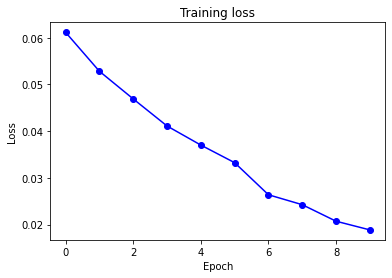

In [62]:
import matplotlib.pyplot as plt


plt.plot(loss_val,'b-o')
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
test_Data = pd.read_csv("/content/drive/MyDrive/Urdu_hate/test_set_taskA_unlabelled - test_set_Fire2022_unlabelled")

model.eval()

predictions , true_labels = [] , []

test_dataset = CustomDataset(test_Data,tokenizer,256)

test_data_loader = torch.utils.data.DataLoader( test_dataset , shuffle = True  , batch_size = 16,num_workers = 2 )


for data in test_data_loader:
  in_id = data['input_ids'].to(device,dtype = torch.long)
  at_mask = data['attention_mask'].to(device,dtype = torch.long)
  t_t_id = data['token_type_ids'].to(device,dtype = torch.long)
  


  with torch.no_grad():
    outputs = model(in_id,at_mask,t_t_id)
  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  predictions.append(logits)

print('DONE')
